# Import 

In [30]:
import gensim.downloader as api
import numpy as np

from sklearn.decomposition  import PCA
import matplotlib.pyplot as plt

In [31]:
# 25, 50, 100 or 200. Số càng lớn thì càng chính xác, nhưng chạy càng lâu các bạn nhé
model = api.load("glove-twitter-50")
word = "beautiful"
print(model[word])

[-6.4862e-01 -7.2943e-01  6.8938e-01  8.0913e-01  7.0819e-02 -1.2213e-01
  1.6231e+00 -1.8273e-01 -1.2289e+00  5.9429e-02 -1.0436e+00  1.2083e-01
 -4.4898e+00 -3.5750e-01 -3.5122e-01  2.8184e-01  1.1997e-01  2.2602e-02
 -3.8894e-01  4.2605e-01  4.5974e-01 -8.8778e-01 -5.8235e-01  1.0916e-01
  7.5807e-02  8.2031e-01 -7.7603e-01  5.0443e-01  1.1180e+00 -3.9499e-01
 -7.1192e-01 -1.5997e-01  3.8877e-01  1.1124e-03  4.6685e-01  2.1218e-01
  1.9705e-01  2.5828e-01 -1.2860e-01  2.1203e-01 -1.4966e+00 -1.0162e+00
  4.1185e-01  8.3209e-01 -7.3911e-01  3.2497e-01  7.9778e-01 -2.0234e-01
 -5.5853e-01 -3.2284e-02]


# Section 1 for word2vec

In [32]:
print("1----------")
result = model.most_similar(word, topn=10)
print(result)

1----------
[('gorgeous', 0.924598217010498), ('lovely', 0.9044452905654907), ('amazing', 0.8897180557250977), ('wonderful', 0.8871688842773438), ('pretty', 0.8808601498603821), ('fabulous', 0.8739015460014343), ('love', 0.855770468711853), ('perfect', 0.8545977473258972), ('nice', 0.8446032404899597), ('beauty', 0.843619167804718)]


# Section 2 for word2vec

In [33]:
print("2----------")
result = model.most_similar(positive=["january", "february"], topn=10)
print(result)

2----------


[('october', 0.9570534229278564), ('august', 0.9502836465835571), ('june', 0.9488087296485901), ('march', 0.9447520971298218), ('december', 0.9338072538375854), ('july', 0.9182709455490112), ('november', 0.9118183255195618), ('september', 0.8861154317855835), ('april', 0.8748382329940796), ('feb.', 0.8494142889976501)]


# Section 3 for word2vec

In [34]:
print("3----------")
result = model.similarity("man", "woman")
print(result)

3----------
0.7059574


# Section 4 for word2vec

In [35]:
print("4----------")
result = model.most_similar(positive=["woman", "king"], negative=["man"], topn=1)
print(result)

4----------
[('prince', 0.7597796320915222)]


# Section 5 for word2vec

In [36]:
print("5----------")
result = model.most_similar(positive=["berlin", "vietnam"], negative=["hanoi"], topn=1)
print(result)

5----------
[('london', 0.7364553213119507)]


# Section 6 for word2vec

In [37]:
print("6----------")
result = model.similarity("marriage", "happiness")
print(result)

6----------
0.54308176


In [38]:
vec_A_embed = model["woman"]
vec_B_embed = model["man"]
result_ = model.similarity("man","woman")
print(result_)

0.7059574


In [39]:

#TODO: Các bạn thử viết 2 cách khác nhau để tính cosine similarity
# giữa 2 vector nhé. Kết quả giống với khi dùng model.similarity() là được
# 1 cách là dùng numpy, 1 cách là không dùng numpy nhé

#Cosine similarity
def consine_similarity(vec_1:np.ndarray,vec_2: np.ndarray) ->float: 
    c = np.dot(vec_1,vec_2)
    vec_1_norm = np.linalg.norm(vec_1) 
    vec_2_norm = np.linalg.norm(vec_2)
    return c / (vec_1_norm*vec_2_norm)


In [40]:
consine_similarity(
    vec_1 = vec_A_embed,
    vec_2 = vec_B_embed
)

0.7059572

In [41]:
#Không sử dụng numpy
import math
def dot_product(vec_1:list,vec_2:list):
    res = 0
    for i in range(len(vec_1)):
        res+= vec_1[i]*vec_2[i] #Tích vô hướng của vector_A và vec_b
    return res
def norm(vec: list) -> float:
    res = 0
    for i in range(len(vec)):
        res+=vec[i]**2
    return math.sqrt(res) #Căn bậc 2 của tổng các vec[i] bình phương
def consine_similarity_not_np(vec_a,vec_b):
    return dot_product(vec_1 = vec_a,vec_2 = vec_b) / (norm(vec = vec_a)*norm(vec = vec_b))


In [42]:
float(f"{consine_similarity_not_np(vec_a = vec_A_embed,vec_b = vec_B_embed):.5f}")

0.70596

VOCABULARY

In [58]:
vocabulary = ["boy","girl","tiger","dog"] #Đầu vào là một cuốn từ điển n từ
vectors_to_visualize = [model[word] for word in vocabulary] #Cho các từ vào model để tạo ra feature vector
print(len(vectors_to_visualize))

4


In [61]:
#Sử dụng PCA để giảm chiều dữ liệu 
pca = PCA(n_components= 2)
#Train mô hình và chuyển dạng dữ liệu thành ma trận 2 chiều
reduce_vec = pca.fit_transform(vectors_to_visualize)

[[-1.1863756  -0.48465797]
 [-2.21190569 -0.38044306]
 [ 2.50438656 -1.35970873]
 [ 0.89389472  2.22480976]]


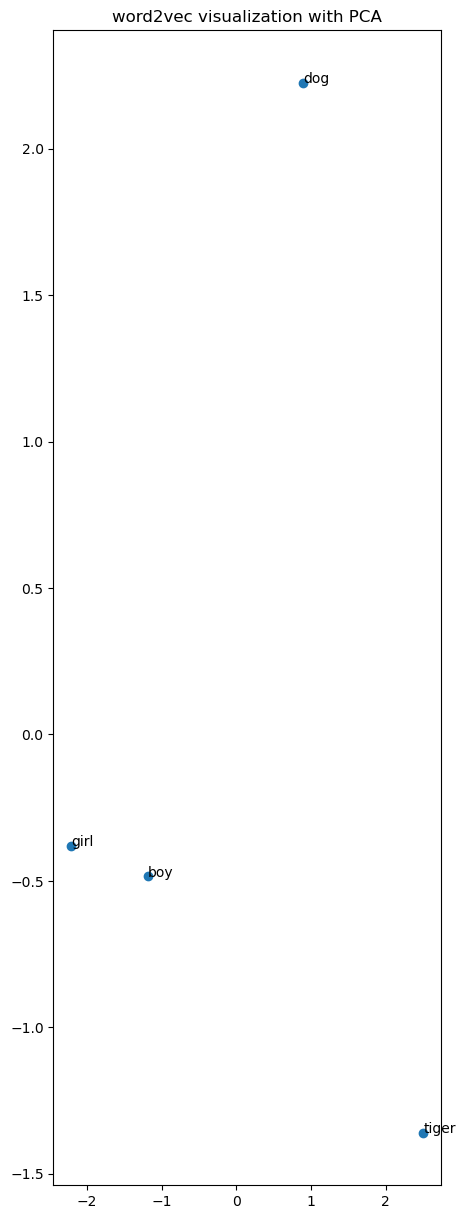

In [60]:
plt.figure(figsize =(5,15))
plt.scatter(reduce_vec[ :,0],reduce_vec[:,1])

for i,word in enumerate(vocabulary):
    plt.annotate(word, xy = (reduce_vec[i,0],reduce_vec[i,1]))

plt.title("word2vec visualization with PCA")
plt.show()